# fvGP comprehensive test

## (0) Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fvgp.gp import GP
%load_ext autoreload
%autoreload 2

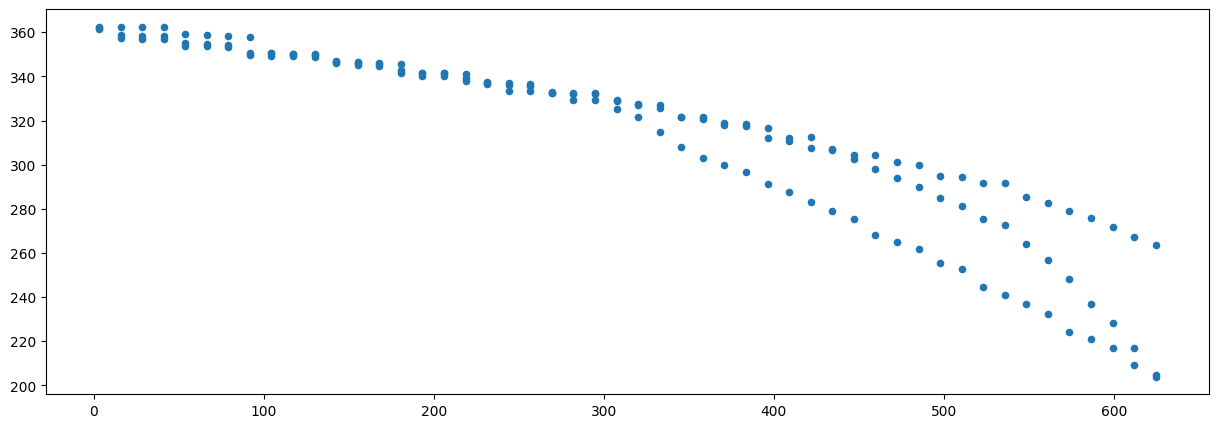

In [2]:
x = np.linspace(0,600,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

x_data = np.load("x_data.npy") #np.random.rand(100)
y_data = np.load("y_data.npy") #f1(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5



plt.figure(figsize = (15,5))

plt.scatter(x_data,y_data, s = 20)

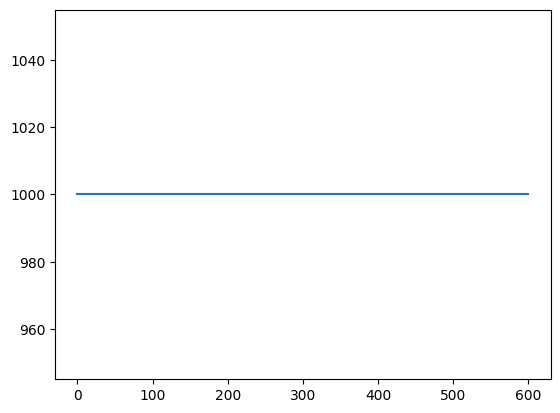

In [45]:
def s(x, my_slope, my_pow, my_intercept):
    o = np.exp(my_slope * (x-my_pow)/600.) + my_intercept
    
    return np.zeros((len(x),1)) + 1000.0


x = np.linspace(0,600,1000)
plt.plot(x,s(x,6.56645290e+00, -2.41247972e+02,1.81827292e+00))
plt.show()


def my_noise(x,hps,obj):
    my_slope = hps[2]
    my_pow = hps[3]
    my_intercept = hps[4]
    my_s = s(x,my_slope,my_pow,my_intercept)
    noise = np.diag(my_s[:,0])
    return noise

#stationary
def skernel(x1,x2,hps,obj):
    d = obj._get_distance_matrix(x1,x2)
    return hps[0] * obj.matern_kernel_diff1(d,hps[1])


#def meanf(x, hps, obj):
#    #print(np.sin(hps[3] * x))
#    return np.sin(hps[3] * x)[:,0]
#plt.figure(figsize = (15,5))
#plt.plot(x,meanf(x, np.array([1.,1.,5.0]), None), color = 'orange', label = 'task1')

Data Plot:


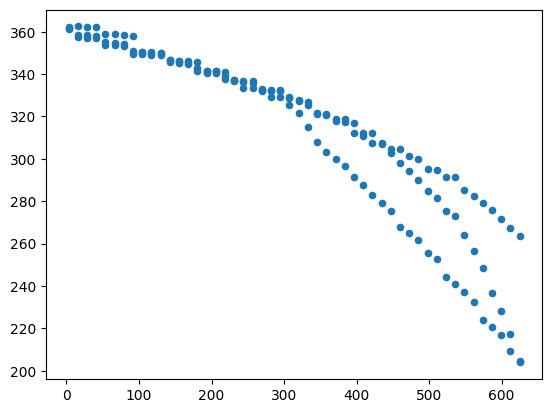

In [46]:
my_gp1 = GP(1, x_data,y_data,
            init_hyperparameters = np.ones((5)),
            #noise_variances=np.ones(y_data.shape) * 10., 
            compute_device='cpu', 
            gp_kernel_function=skernel, 
            gp_kernel_function_grad=None, 
            #gp_mean_function=meanf, 
            gp_mean_function_grad=None,
            gp_noise_function=my_noise,
            normalize_y=False,
            sparse_mode=False,
            gp2Scale = False,
            store_inv=False, 
            ram_economy=False, 
            args=None,
            )


print("Data Plot:")
plt.scatter(my_gp1.x_data,my_gp1.y_data, s = 20)
plt.show()


hps_bounds = np.array([[100.,1000000.],
                       [100.,10000.],
                       [1.0,10.], #slope
                       [-300.,300.], #pow
                       [0.1,100.]]) #intercept

#my_gp1.update_gp_data(x_data, y_data)
#print("Standard Training")
my_gp1.train(hps_bounds)


#print("Global Training")
#my_gp1.train(hps_bounds, method='global')
#print("hps: ", my_gp1.get_hyperparameters())
#print("Local Training")
#my_gp1.train(hps_bounds, method='local')
#print(my_gp1.get_hyperparameters())
#print("MCMC Training")
#my_gp1.train(hps_bounds, method='mcmc', max_iter=1000)
#print(my_gp1.get_hyperparameters())
#my_gp1.train(hps_bounds, method='hgdl')


In [47]:
#my_gp1.test_log_likelihood_gradient(np.array([100.,100.]))

In [48]:
#my_gp1.train(hps_bounds, method='hgdl', max_iter = 5)

In [49]:
#opt_obj = my_gp1.train_async(hps_bounds)

In [50]:
#my_gp1.update_hyperparameters(opt_obj)
#for entry in opt_obj.optima.list:
#    print(entry)
#    print("")

#my_gp1.entropy(my_gp1.prior_covariance)

In [51]:
#my_gp1.hyperparameters

In [52]:
#my_gp1.V

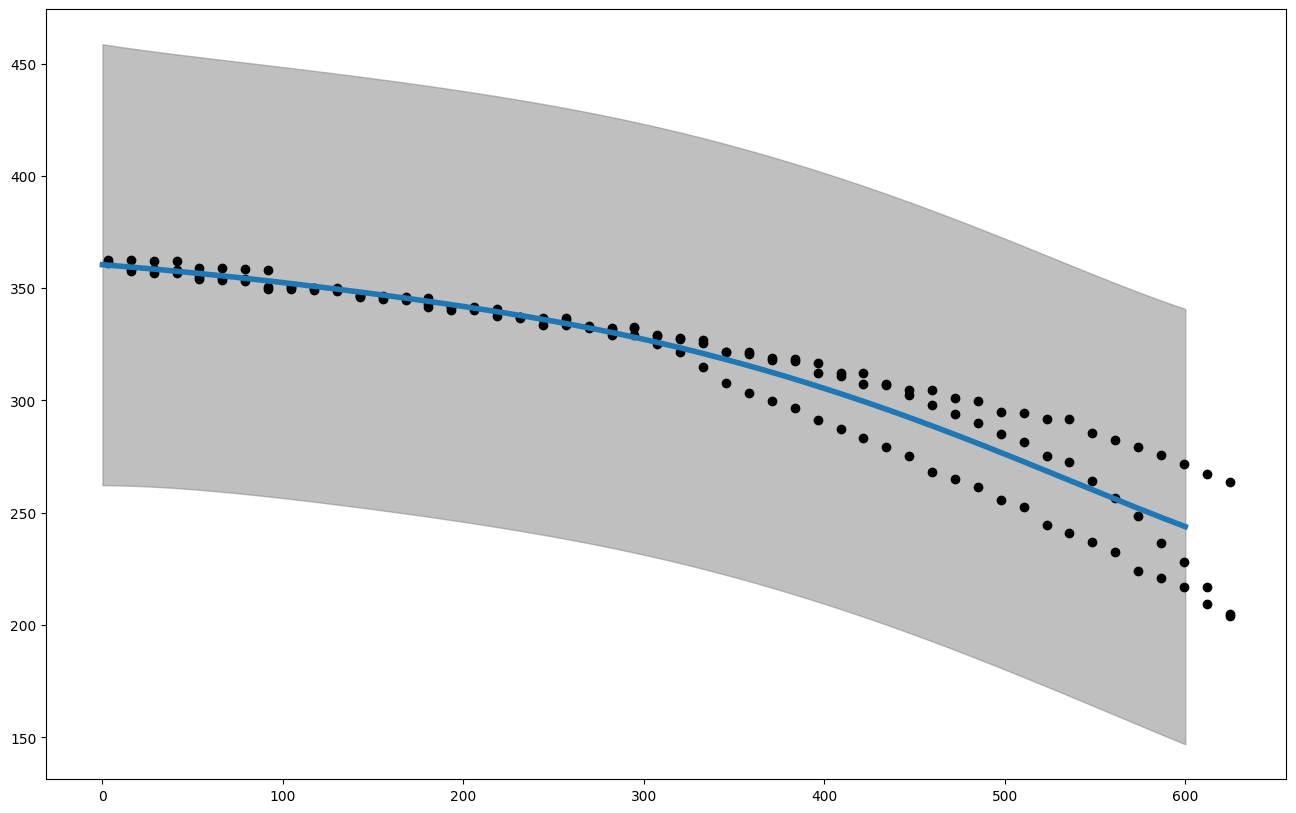

In [57]:
#let's make a prediction
x_pred = np.linspace(0,600,1000)

mean1 = my_gp1.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp1.posterior_covariance(x_pred.reshape(-1,1), variance_only=False, add_noise=True)["v(x)"]

plt.figure(figsize = (16,10))
plt.plot(x_pred,mean1, label = "posterior mean", linewidth = 4)
#plt.plot(x_pred,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x_pred, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data, color = 'black')
#plt.legend(fontsize = 20)

#print("error: ", np.sum(f1(x)-mean1)**2 / len(mean1))

In [54]:
print(my_gp1.KV)

[[13043.8649069  12041.4162151  12034.20148195 ...  9064.29122513
   8974.400248    8884.46134884]
 [12041.4162151  13043.8649069  12041.4162151  ...  9154.0944833
   9064.29122513  8974.400248  ]
 [12034.20148195 12041.4162151  13043.8649069  ...  9243.76861329
   9154.0944833   9064.29122513]
 ...
 [ 9064.29122513  9154.0944833   9243.76861329 ... 13043.8649069
  12041.4162151  12034.20148195]
 [ 8974.400248    9064.29122513  9154.0944833  ... 12041.4162151
  13043.8649069  12041.4162151 ]
 [ 8884.46134884  8974.400248    9064.29122513 ... 12034.20148195
  12041.4162151  13043.8649069 ]]


In [ ]:
my_gp1.stop_training(opt_obj)
my_gp1.kill_training(opt_obj)

In [ ]:
input_dim = 1
N = 10000
x_data = np.random.rand(N,input_dim)
y_data = f1(x_data)
hps_n = 2

hps_bounds = np.array([[0.1,10.],    ##signal var of stat kernel
                        [0.001,0.02]     ##length scale for stat kernel
                                ])

init_hps = np.random.uniform(size = len(hps_bounds), low = hps_bounds[:,0], high = hps_bounds[:,1])
my_gp2S = GP(1, x_data,y_data,init_hps,  
            gp2Scale = True, gp2Scale_batch_size= 1000
            )



my_gp2S.train(hps_bounds, max_iter = 20, init_hyperparameters = init_hps)
       

In [ ]:
print(my_gp2S.V)


x_pred = np.linspace(0,1,1000)

mean1 = my_gp2S.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp2S.posterior_covariance(x_pred.reshape(-1,1), variance_only=False)["v(x)"]


plt.figure(figsize = (16,10))
plt.plot(x_pred,mean1, label = "posterior mean", linewidth = 4)
plt.plot(x_pred,f1(x_pred), label = "latent function", linewidth = 4)
plt.fill_between(x_pred, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
plt.scatter(x_data,y_data, color = 'black')


## Multi Task

In [ ]:
from fvgp.fvgp import fvGP

x = np.linspace(0,1,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

def f2(x):
    return np.sin(5. * x) + np.cos(2. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

x_data = np.random.rand(100)
y_data = np.empty((len(x_data),2))
y_data[:,0] = f1(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
y_data[:,1] = f2(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
plt.figure(figsize = (15,5))
plt.plot(x,f1(x), color = 'orange', label = 'task1')
plt.plot(x,f2(x), color = 'green',  label = 'task2')
plt.legend()
plt.scatter(x_data,y_data[:,0], s = 20)
plt.scatter(x_data,y_data[:,1], s = 20)

my_gp2 = fvGP(1, 1, 2, x_data,y_data,np.ones((4)),
            noise_variances=None, 
            compute_device='cpu', 
            gp_kernel_function=None, 
            gp_kernel_function_grad=None, 
            gp_mean_function=meanf, 
            gp_mean_function_grad=None,
            gp_noise_function=None,
            normalize_y=False,
            sparse_mode=False,
            store_inv=True, 
            ram_economy=False, 
            args=None,
            )


print("Data Plot:")
plt.scatter(my_gp1.x_data,my_gp1.y_data, s = 20)
plt.show()
x_pred = np.linspace(0,1,1000)


hps_bounds = np.array([[0.001,10.],[0.001,10.],[0.001,10.],[0.001,10.]])

#my_gp1.update_gp_data(x_data, y_data)
print("Global Training")
my_gp2.train(my_gp2.hps_bounds, method='global')
#print("hps: ", my_gp1.get_hyperparameters())
#print("Local Training")
#my_gp1.train(hps_bounds, method='local')
#print(my_gp1.get_hyperparameters())
#print("MCMC Training")
#my_gp1.train(hps_bounds, method='mcmc', max_iter=1000)
#print(my_gp1.get_hyperparameters())

In [ ]:
my_gp2.input_space_dim


In [ ]:
#let's make a prediction
res = my_gp2.posterior_mean(x_pred.reshape(-1,1), x_out=np.array([[0],[1]]), hyperparameters=np.array([1,1,1,1]))
mean2 = res["f(x)"][0:1000]
var2 =  my_gp2.posterior_covariance(x_pred.reshape(-1,1), x_out=np.array([[0],[1]]))["v(x)"][0:1000]

plt.figure(figsize = (16,10))
plt.plot(x,mean2, label = "posterior mean", linewidth = 4)
plt.plot(x,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x, mean2 - 3. * np.sqrt(var2), mean2 + 3. * np.sqrt(var2), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data[:,0], color = 'black')
#plt.legend(fontsize = 20)
plt.xticks([])
plt.yticks([])
print("error: ", np.sum(f1(x)-mean1)**2 / len(mean1))

# Performance Tests